In [114]:
!pip install --upgrade pip

Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 54.5 MB/s eta 0:00:00:00:01
  Attempting uninstall: pip
    Found existing installation: pip 22.0.4
    Uninstalling pip-22.0.4:
      Successfully uninstalled pip-22.0.4


In [115]:
!pip install prophet awswrangler

Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com


In [116]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [118]:
import awswrangler as wr
path = f"s3://source-voltar/source/fed.csv"
df=wr.s3.read_csv(path)
df.head()

,date,value
0,2022-07-01,0.20
1,2022-06-01,0.24
2,2022-05-01,0.32
3,2022-04-01,0.18
4,2022-03-01,0.20


In [119]:
df.describe()

,value
count,120.000000
mean,2.140833
std,12.799137
min,0.100000
25%,0.240000
50%,0.350000
75%,0.580000
max,100.000000


In [120]:
# Select only the important features i.e. the date and price
data = df[["date","value"]] # select Date and Price
# Rename the features: These names are NEEDED for the model fitting
data = df.rename(columns = {"date":"ds","value":"y"}) #renaming the columns of the dataset
data.head(5)

,ds,y
0,2022-07-01,0.20
1,2022-06-01,0.24
2,2022-05-01,0.32
3,2022-04-01,0.18
4,2022-03-01,0.20


In [121]:
from prophet import Prophet
m = Prophet(daily_seasonality = True) # the Prophet class (model)
m.fit(data) # fit the model using all data

04:44:49 - cmdstanpy - INFO - Chain [1] start processing
04:44:49 - cmdstanpy - INFO - Chain [1] done processing


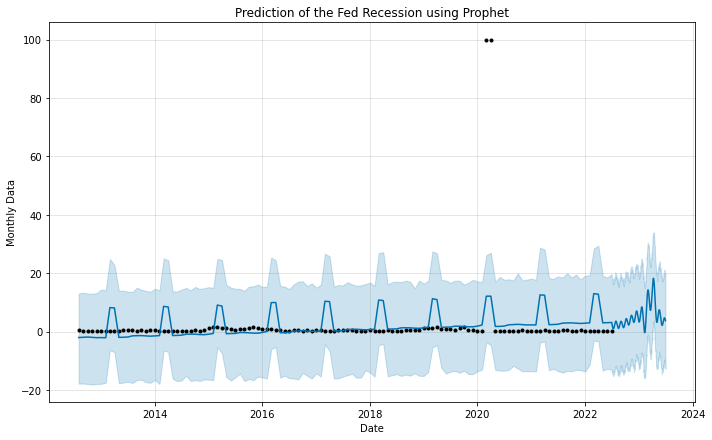

In [122]:
future = m.make_future_dataframe(periods=365) #we need to specify the number of days in future
prediction = m.predict(future)
m.plot(prediction)
plt.title("Prediction of the Fed Recession using Prophet")
plt.xlabel("Date")
plt.ylabel("Monthly Data")
plt.savefig('plots/Prediction-Fed-Recession-Prophet-Plot.jpg',bbox_inches='tight')
plt.show()

In [124]:
print('hi my name is cassandra')


hi my name is cassandra
